In [2]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df=pd.read_csv('../dataset/Obesity Classification.csv')

In [4]:
X=df.drop(columns=['ID','Label'])
Y=df['Label']

In [5]:
X

,Age,Gender,Height,Weight,BMI
0,25,Male,175,80,25.3
1,30,Female,160,60,22.5
2,35,Male,180,90,27.3
3,40,Female,150,50,20.0
4,45,Male,190,100,31.2
...,...,...,...,...,...
103,11,Male,175,10,3.9
104,16,Female,160,10,3.9
105,21,Male,180,15,5.6
106,26,Female,150,15,5.6


In [6]:
Catgorigal_data=X.select_dtypes(['object']).columns
numerical_data=X.select_dtypes(['number']).columns

In [7]:
Preprocess=ColumnTransformer(transformers=[('transform',OneHotEncoder(),Catgorigal_data),('scale',StandardScaler(),numerical_data)])

In [8]:
tranform=Pipeline([('preprocess',Preprocess),('pca',PCA(n_components=2))])

In [9]:
db=DBSCAN(eps=0.5,min_samples=4)

In [10]:
db.fit_predict(tranform.fit_transform(X))

array([ 0,  1,  0,  1,  0,  1,  0,  1, -1,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  0,  1,  0,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,  1, -1,
        1, -1,  1, -1, -1, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0], dtype=int64)

In [11]:
labels = db.labels_

In [12]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 14


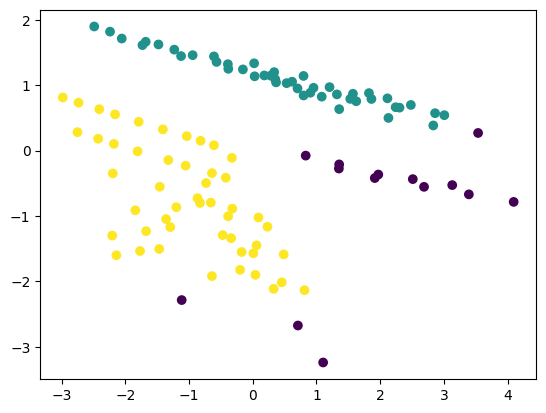

In [13]:
plt.scatter(tranform.fit_transform(X)[:,0],tranform.fit_transform(X)[:,1],c=labels)

In [14]:
silhouette_score(tranform.fit_transform(X),labels)

0.3280765817478834